In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

C:\Users\Shashank Puttha\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression


# import data

In [3]:
df=pd.read_excel('telcom_data.xlsx')
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# EDA - Exploarty Data Analysis on that data

In [4]:
df.shape

(150001, 55)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
df.isnull()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149999,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

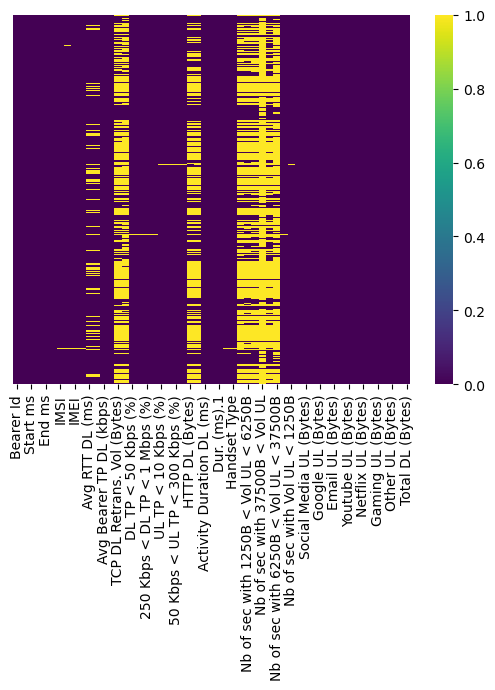

In [7]:
# Heatmap

sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [8]:
df.describe()

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,1770.428647,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,4625.355500,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,47.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,1120.000000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,58613.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


# Remove unwanted Columns

In [9]:
df1=df.drop(["Bearer Id","Last Location Name"],axis=1)
df1.head()

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,NaN,NaN,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,NaN,NaN,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,NaN,NaN,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


# Get the null value percentage for every feature

In [10]:
null_percent=df1.isnull().sum()
print(null_percent.to_string())

Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)  

In [11]:
null_percent=df1.isnull().sum()/df.shape[0]*100
print(null_percent.to_string())

Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)         

# Drop Column/Feature

In [12]:
missing_value=null_percent[null_percent>50]
missing_value

TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
HTTP DL (Bytes)                             54.315638
HTTP UL (Bytes)                             54.539636
Nb of sec with 125000B < Vol DL             65.024900
Nb of sec with 1250B < Vol UL < 6250B       61.928920
Nb of sec with 31250B < Vol DL < 125000B    62.390251
Nb of sec with 37500B < Vol UL              86.835421
Nb of sec with 6250B < Vol DL < 31250B      58.877607
Nb of sec with 6250B < Vol UL < 37500B      74.561503
dtype: float64

In [13]:
df1["HTTP DL (Bytes)"].value_counts()

3.629000e+03    266
8.749000e+03    238
4.140000e+02    175
9.200000e+01    157
1.720000e+02    127
               ... 
6.028600e+04      1
7.361000e+04      1
3.207841e+08      1
2.967112e+09      1
1.638899e+07      1
Name: HTTP DL (Bytes), Length: 63527, dtype: int64

# Identifying top 10 handset used by customer

In [14]:
df1["Handset Type"].unique()

array(['Samsung Galaxy A5 Sm-A520F', 'Samsung Galaxy J5 (Sm-J530)',
       'Samsung Galaxy A8 (2018)', ..., 'Asustek Asus Zb500Kg',
       'Huawei Mediapad T5 10 Pro',
       'Shenzhen Jeko Co. Blackview Bv5800 Pro'], dtype=object)

In [15]:
df2=df1["Handset Type"].value_counts().nlargest(10)
df2=pd.DataFrame(df2)
df2

,Handset Type
Huawei B528S-23A,19752
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
undefined,8987
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993
Apple iPhone Xr (A2105),4568
Samsung Galaxy S8 (Sm-G950F),4520
Apple iPhone X (A1901),3813


# Top Handset manufacturer Company

In [16]:
df3=df1["Handset Manufacturer"].value_counts().nlargest(10)
df3=pd.DataFrame(df2)
df3

,Handset Type
Huawei B528S-23A,19752
Apple iPhone 6S (A1688),9419
Apple iPhone 6 (A1586),9023
undefined,8987
Apple iPhone 7 (A1778),6326
Apple iPhone Se (A1723),5187
Apple iPhone 8 (A1905),4993
Apple iPhone Xr (A2105),4568
Samsung Galaxy S8 (Sm-G950F),4520
Apple iPhone X (A1901),3813


In [17]:
df1.columns

Index(['Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
       'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 625

# Missing Value Imputation

In [18]:
missing_value_feature=null_percent[null_percent>0]
print(missing_value_feature)
print(len(missing_value_feature))

Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)         

In [19]:
int_features=df.select_dtypes(include=["int64"]).columns
print(int_features.shape[0])
print("Integer features names",int_features.to_list())

0
Integer features names []


In [20]:
float_features=df.select_dtypes(include=["float64"]).columns
print(float_features.shape[0])
print("Float features names",float_features.to_list())

49
Float features names ['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI', 'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1', 'Nb of sec with 125000B < Vol DL', 'Nb of sec with 1250B < Vol UL < 6250B', 'Nb of sec with 31250B < Vol DL < 125000B', 'Nb of sec with 37500B < Vol UL', 'Nb of sec with 6250B < Vol DL < 31250B', 'Nb of sec with 6250B < Vol UL < 37500B', 'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes

In [21]:
cat_features=df.select_dtypes(include=["object"]).columns
print(cat_features.shape[0])
print("Categorical features names",cat_features.to_list())

4
Categorical features names ['Bearer Id', 'Last Location Name', 'Handset Manufacturer', 'Handset Type']


# Categorical , Integer , Float  feature

In [22]:
# float 

float_na_feature=missing_value_feature[missing_value_feature.keys().isin(float_features)]
print(float_na_feature)
print(len(float_na_feature))

Start ms                                     0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)                          0.527996
10 Kbps < UL TP < 50 Kbps (%)                0.527996
50 Kbps < UL TP < 300 Kbps (

In [23]:
# int

int_na_feature=missing_value_feature[missing_value_feature.keys().isin(int_features)]
print(int_na_feature)
print(len(int_na_feature))

Series([], dtype: float64)
0


In [24]:
# Categorical

cat_na_feature=missing_value_feature[missing_value_feature.keys().isin(cat_features)]
print(cat_na_feature)
print(len(cat_na_feature))

Handset Manufacturer    0.381331
Handset Type            0.381331
dtype: float64
2


# Handling Missing Value

In [25]:
# backup
df_4=df1.copy()
df1.shape

(150001, 53)

In [26]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 53 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Start                                     150000 non-null  datetime64[ns]
 1   Start ms                                  150000 non-null  float64       
 2   End                                       150000 non-null  datetime64[ns]
 3   End ms                                    150000 non-null  float64       
 4   Dur. (ms)                                 150000 non-null  float64       
 5   IMSI                                      149431 non-null  float64       
 6   MSISDN/Number                             148935 non-null  float64       
 7   IMEI                                      149429 non-null  float64       
 8   Avg RTT DL (ms)                           122172 non-null  float64       
 9   Avg RTT UL (ms)

In [27]:
def percent_missing(df_4):
  total_cells=np.product(df_4.shape)
  missing_count=df_4.isnull().sum()
  total_missing=missing_count.sum()

  print("Total Missing value percentage in Dataset",round(((total_missing/total_cells)*100),2),"%","Missing Value")

percent_missing(df_4)

Total Missing value percentage in Dataset 12.95 % Missing Value


In [28]:
# check missing value in each column
df_4.isnull().sum()

Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)                             754
UL TP < 10 Kbps (%)                            792
10 Kbps < UL TP < 50 Kbps (%)  

In [29]:
null_percent=df1.isnull().sum()/df1.shape[0]*100
print(null_percent.to_string())

Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%)                0.502663
DL TP > 1 Mbps (%)                           0.502663
UL TP < 10 Kbps (%)         

In [30]:
# Droping value greater than 50% of missing data
df_clean1=df1.drop(["TCP DL Retrans. Vol (Bytes)","TCP UL Retrans. Vol (Bytes)","HTTP DL (Bytes)","HTTP UL (Bytes)","Nb of sec with 125000B < Vol DL","Nb of sec with 1250B < Vol UL < 6250B",
                   "Nb of sec with 31250B < Vol DL < 125000B","Nb of sec with 37500B < Vol UL","Nb of sec with 6250B < Vol DL < 31250B","Nb of sec with 6250B < Vol UL < 37500B"],axis=1)
df_clean1.shape

(150001, 43)

In [31]:
df_clean1

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,NaN,NaN,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,NaN,NaN,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,NaN,NaN,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,32.0,0.0,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,27.0,2.0,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,43.0,6.0,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,37.0,5.0,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [32]:
null_percent=df_clean1.isnull().sum()/df_clean1.shape[0]*100
print(null_percent.to_string())

Start                              0.000667
Start ms                           0.000667
End                                0.000667
End ms                             0.000667
Dur. (ms)                          0.000667
IMSI                               0.379997
MSISDN/Number                      0.710662
IMEI                               0.381331
Avg RTT DL (ms)                   18.552543
Avg RTT UL (ms)                   18.541210
Avg Bearer TP DL (kbps)            0.000667
Avg Bearer TP UL (kbps)            0.000667
DL TP < 50 Kbps (%)                0.502663
50 Kbps < DL TP < 250 Kbps (%)     0.502663
250 Kbps < DL TP < 1 Mbps (%)      0.502663
DL TP > 1 Mbps (%)                 0.502663
UL TP < 10 Kbps (%)                0.527996
10 Kbps < UL TP < 50 Kbps (%)      0.527996
50 Kbps < UL TP < 300 Kbps (%)     0.527996
UL TP > 300 Kbps (%)               0.527996
Activity Duration DL (ms)          0.000667
Activity Duration UL (ms)          0.000667
Dur. (ms).1                     

# Handling Start

In [33]:
df_clean1["Start"].value_counts()


2019-04-29 07:08:38    14
2019-04-26 07:29:35    10
2019-04-24 19:16:11    10
2019-04-26 07:39:39     9
2019-04-24 20:48:19     9
                       ..
2019-04-25 17:20:31     1
2019-04-25 17:20:24     1
2019-04-25 17:20:08     1
2019-04-25 17:20:01     1
2019-04-27 00:48:18     1
Name: Start, Length: 111881, dtype: int64

In [34]:
def fix_missing_ffill(df,col):
  df[col]=df[col].fillna(method="ffill")
  return df[col]

def fix_missing_bfill(df,col):
  df[col]=df[col].fillna(method="bfill")
  return df[col]


In [35]:
df_clean1["Start"]=fix_missing_ffill(df_clean1,"Start")

In [36]:
df_clean1["Start"].isnull().sum()

0

# Handling Start ms

In [37]:
df_clean1["Start ms"]=fix_missing_ffill(df_clean1,"Start ms")

In [38]:
df_clean1["Start ms"].isnull().sum()

0

# Handling End


In [39]:
df_clean1["End"]=fix_missing_bfill(df_clean1,"End")

In [40]:
df_clean1["End"].isnull().sum()

1

In [41]:
df_clean1["End"]=fix_missing_ffill(df_clean1,"End")

In [42]:
df_clean1["End"].isnull().sum()

0

# Handling End ms

In [43]:
df_clean1["End ms"]=fix_missing_ffill(df_clean1,"End ms")

In [44]:
df_clean1["End ms"].isnull().sum()

0

# Handling Dur. (ms)

In [45]:
df_clean1["Dur. (ms)"]=fix_missing_ffill(df_clean1,"Dur. (ms)")

In [46]:
df_clean1["Dur. (ms)"].isnull().sum()

0

# Handling IMSI

In [47]:
df_clean1["IMSI"]=fix_missing_bfill(df_clean1,"IMSI")

In [48]:
df_clean1["IMSI"].isnull().sum()

1

In [49]:
df_clean1["IMSI"]=fix_missing_ffill(df_clean1,"IMSI")

In [50]:
df_clean1["IMSI"].isnull().sum()

0

# Handling MSISDN/Number

In [51]:
df4=df_clean1.fillna(df_clean1["MSISDN/Number"].mean())

In [52]:
df_clean1["MSISDN/Number"].isnull().sum()

1066

In [53]:
df_clean1["MSISDN/Number"]=fix_missing_ffill(df_clean1,"MSISDN/Number")

In [54]:
df_clean1["MSISDN/Number"].isnull().sum()

0

# Handling IMEI

In [55]:
df_clean1["IMEI"] = df_clean1["IMEI"].fillna(0)

In [56]:
df_clean1["IMEI"].isnull().sum()

0

# Handling Avg RTT DL (ms)

In [57]:
df_clean1["Avg RTT DL (ms)"]=fix_missing_ffill(df_clean1,"Avg RTT DL (ms)")

In [58]:
df_clean1["Avg RTT DL (ms)"].isnull().sum()

0

# Handling Avg RTT UL (ms)

In [59]:
df_clean1["Avg RTT UL (ms)"]=fix_missing_ffill(df_clean1,"Avg RTT UL (ms)")

In [60]:
df_clean1["Avg RTT UL (ms)"].isnull().sum()

0

# Handling Avg Bearer TP DL (kbps)

In [61]:
df_clean1["Avg Bearer TP DL (kbps)"]=fix_missing_ffill(df_clean1,"Avg Bearer TP DL (kbps)")

In [62]:
df_clean1["Avg Bearer TP DL (kbps)"].isnull().sum()

0

# Handling Avg RTT UL (ms)

In [63]:
df_clean1["Avg Bearer TP UL (kbps)"]=fix_missing_ffill(df_clean1,"Avg Bearer TP UL (kbps)")

In [64]:
df_clean1["Avg Bearer TP UL (kbps)"].isnull().sum()

0

# Handling DL TP < 50 Kbps (%)

In [65]:
df_clean1["DL TP < 50 Kbps (%)"]=fix_missing_ffill(df_clean1,"DL TP < 50 Kbps (%)")

In [66]:
df_clean1["DL TP < 50 Kbps (%)"].isnull().sum()

0

# Handling 50 Kbps < DL TP < 250 Kbps (%)

In [67]:
df_clean1["50 Kbps < DL TP < 250 Kbps (%)"]=fix_missing_ffill(df_clean1,"50 Kbps < DL TP < 250 Kbps (%)")

In [68]:
df_clean1["50 Kbps < DL TP < 250 Kbps (%)"].isnull().sum()

0

# Handling 250 Kbps < DL TP < 1 Mbps (%)

In [69]:
df_clean1["250 Kbps < DL TP < 1 Mbps (%)"]=fix_missing_ffill(df_clean1,"250 Kbps < DL TP < 1 Mbps (%)")

In [70]:
df_clean1["250 Kbps < DL TP < 1 Mbps (%)"].isnull().sum()

0

# Handling DL TP > 1 Mbps (%)

In [71]:
df_clean1["DL TP > 1 Mbps (%)"]=fix_missing_ffill(df_clean1,"DL TP > 1 Mbps (%)")

In [72]:
df_clean1["DL TP > 1 Mbps (%)"].isnull().sum()

0

# Handling UL TP < 10 Kbps (%)

In [73]:
df_clean1["UL TP < 10 Kbps (%)"]=fix_missing_ffill(df_clean1,"UL TP < 10 Kbps (%)")

In [74]:
df_clean1["UL TP < 10 Kbps (%)"].isnull().sum()

0

# Handling 10 Kbps < UL TP < 50 Kbps (%)

In [75]:
df_clean1["10 Kbps < UL TP < 50 Kbps (%)"]=fix_missing_ffill(df_clean1,"10 Kbps < UL TP < 50 Kbps (%)")

In [76]:
df_clean1["10 Kbps < UL TP < 50 Kbps (%)"].isnull().sum()

0

# Handling 50 Kbps < UL TP < 300 Kbps (%)


In [77]:
df_clean1["50 Kbps < UL TP < 300 Kbps (%)"]=fix_missing_ffill(df_clean1,"50 Kbps < UL TP < 300 Kbps (%)")

In [78]:
df_clean1["50 Kbps < UL TP < 300 Kbps (%)"].isnull().sum()

0

# Handling UL TP > 300 Kbps (%)

In [79]:
df_clean1["UL TP > 300 Kbps (%)"]=fix_missing_ffill(df_clean1,"UL TP > 300 Kbps (%)")

In [80]:
df_clean1["UL TP > 300 Kbps (%)"].isnull().sum()

0

# Handling Activity Duration DL (ms)

In [81]:
df_clean1["Activity Duration DL (ms)"]=fix_missing_ffill(df_clean1,"Activity Duration DL (ms)")

In [82]:
df_clean1["Activity Duration DL (ms)"].isnull().sum()

0

# Handling Activity Duration UL (ms)


In [83]:
df_clean1["Activity Duration UL (ms)"]=fix_missing_ffill(df_clean1,"Activity Duration UL (ms)")

In [84]:
df_clean1["Activity Duration UL (ms)"].isnull().sum()

0

# Handling Dur. (ms).1

In [85]:
df_clean1["Dur. (ms).1"]=fix_missing_ffill(df_clean1,"Dur. (ms).1")

In [86]:
df_clean1["Dur. (ms).1"].isnull().sum()

0

# Handling Handset Manufacturer

In [87]:
df_clean1["Handset Manufacturer"]=df_clean1["Handset Manufacturer"].fillna(df_clean1["Handset Manufacturer"].mode()[0])

In [88]:
df_clean1["Handset Manufacturer"].isnull().sum()

0

# Handling Handset Type

In [89]:
df_clean1["Handset Type"]=df_clean1["Handset Type"].fillna(df_clean1["Handset Type"].mode()[0])

In [90]:
df_clean1["Handset Type"].isnull().sum()

0

# Handling Nb of sec with Vol DL < 6250B

In [91]:
df_clean1["Nb of sec with Vol DL < 6250B"]=df_clean1["Nb of sec with Vol DL < 6250B"].fillna(df_clean1["Nb of sec with Vol DL < 6250B"].mode()[0])

In [92]:
df_clean1["Nb of sec with Vol DL < 6250B"].isnull().sum()

0

# Handling Nb of sec with Vol UL < 1250B

In [93]:
df_clean1["Nb of sec with Vol UL < 1250B"]=fix_missing_ffill(df_clean1,"Nb of sec with Vol UL < 1250B")

In [94]:
df_clean1["Nb of sec with Vol UL < 1250B"].isnull().sum()

0

# Handling Total UL (Bytes)

In [95]:
df_clean1["Total UL (Bytes)"]=fix_missing_ffill(df_clean1,"Total UL (Bytes)")

In [96]:
df_clean1["Total UL (Bytes)"].isnull().sum()

0

# Handling Total DL (Bytes)


In [97]:
df_clean1["Total DL (Bytes)"]=fix_missing_ffill(df_clean1,"Total DL (Bytes)")

In [98]:
df_clean1["Total DL (Bytes)"].isnull().sum()

0

In [99]:
df_clean1["Total DL (Bytes)"]=fix_missing_bfill(df_clean1,"Total DL (Bytes)")

In [100]:
df_clean1["Total DL (Bytes)"].isnull().sum()

0

In [101]:
df_clean1["Total DL (Bytes)"]=df_clean1["Total DL (Bytes)"].fillna(df_clean1["Total DL (Bytes)"].mode()[0])

In [102]:
df_clean1["Total DL (Bytes)"].isnull().sum()

0

In [103]:
df_clean1.isnull().sum()

Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250B     0
Nb of sec with Vol UL < 1250B     0
Social Media DL (Bytes)     

<AxesSubplot:>

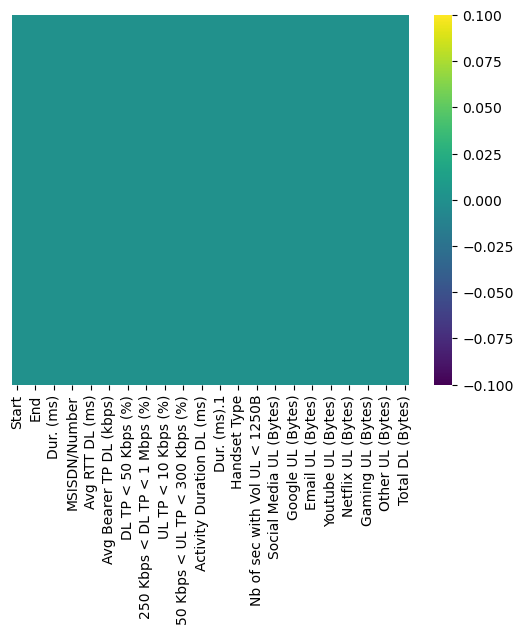

In [104]:
# Heatmap
sns.heatmap(df_clean1.isnull(),yticklabels=False,cmap="viridis")

# Univariate Analysis

## Categorical Feature

### Handset Manufacturer

<AxesSubplot:xlabel='Handset Manufacturer', ylabel='count'>

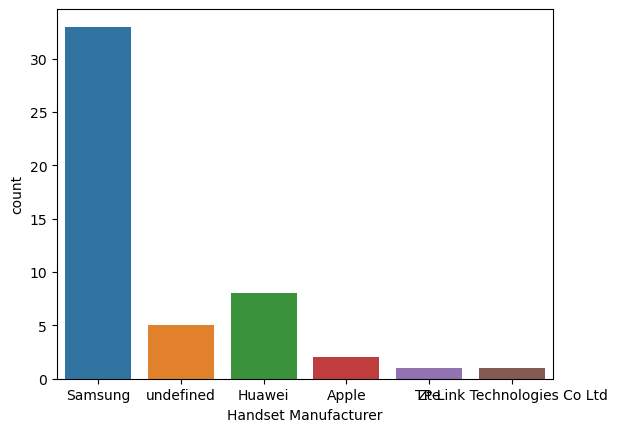

In [105]:
# Find aggregate Handset Manufacturer

sns.countplot(df_clean1["Handset Manufacturer"].head(50))

<AxesSubplot:ylabel='Handset Manufacturer'>

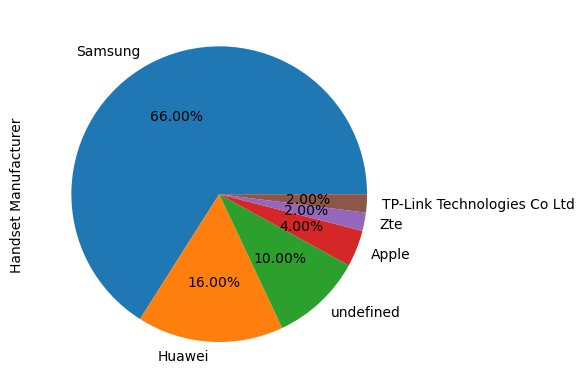

In [106]:
df_clean1["Handset Manufacturer"].head(50).value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:>

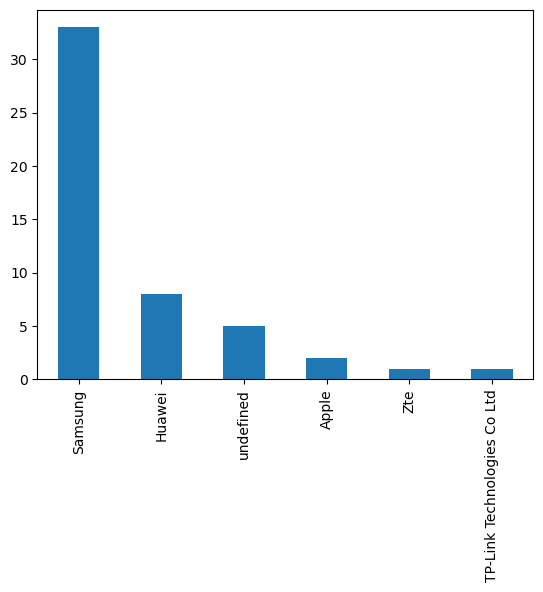

In [107]:
df_clean1["Handset Manufacturer"].head(50).value_counts().plot(kind="bar")

### Handset Type

<AxesSubplot:xlabel='Handset Type', ylabel='count'>

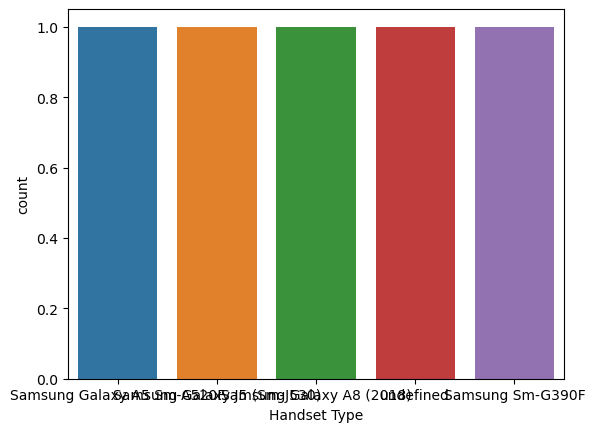

In [108]:
# Find aggregate Handset Manufacturer

sns.countplot(df_clean1["Handset Type"].head(5))

<AxesSubplot:ylabel='Handset Type'>

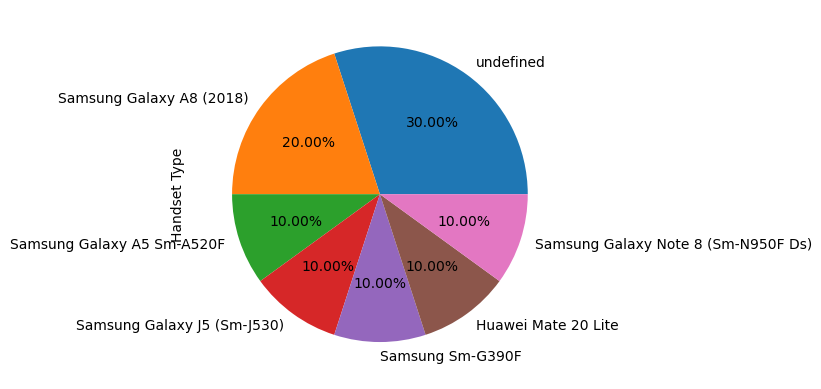

In [109]:
df_clean1["Handset Type"].head(10).value_counts().plot(kind="pie",autopct="%1.2f%%")

<AxesSubplot:>

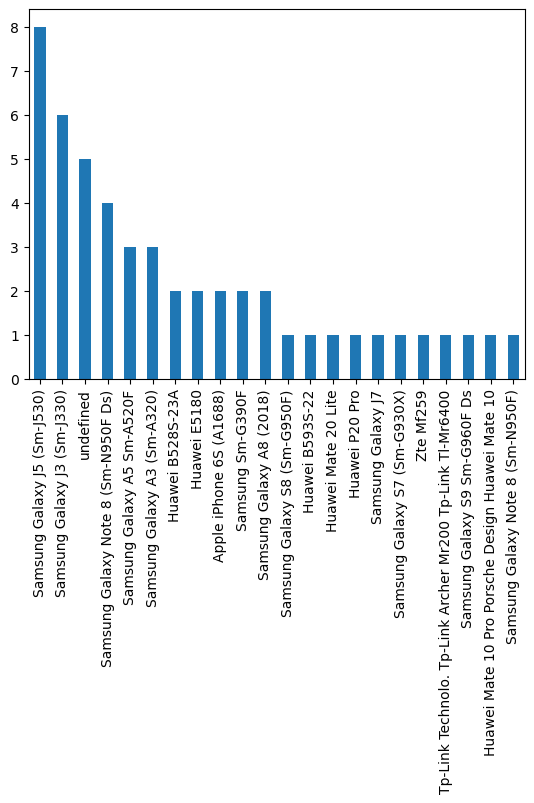

In [110]:
df_clean1["Handset Type"].head(50).value_counts().plot(kind="bar")

## Numerical Features

### Social Media DL (Bytes)

<AxesSubplot:xlabel='Social Media DL (Bytes)', ylabel='Density'>

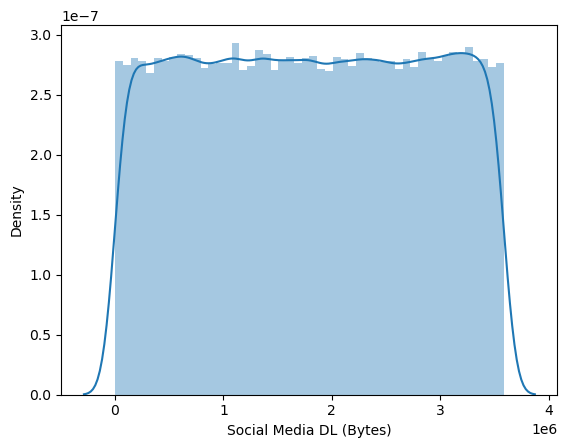

In [111]:
sns.distplot(df_clean1["Social Media DL (Bytes)"])

In [112]:
df_clean1["Social Media DL (Bytes)"].skew()

-0.002136239313678744

### Social Media UL (Bytes)

<AxesSubplot:xlabel='Social Media UL (Bytes)', ylabel='Density'>

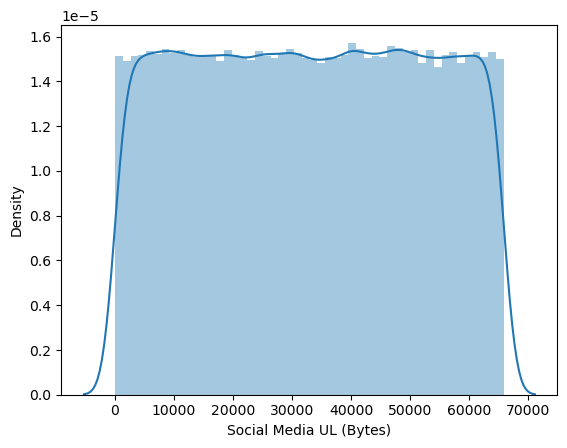

In [113]:
sns.distplot(df_clean1["Social Media UL (Bytes)"])

In [114]:
df_clean1["Social Media UL (Bytes)"].skew()

-0.00035925291932168693

### Google DL (Bytes)

<AxesSubplot:xlabel='Google DL (Bytes)', ylabel='Density'>

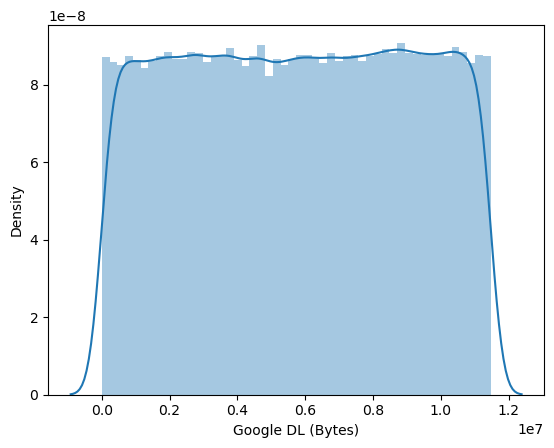

In [115]:
sns.distplot(df_clean1["Google DL (Bytes)"])

In [116]:
df_clean1["Google DL (Bytes)"].skew()

-0.00809234792632722

### Google UL (Bytes)

<AxesSubplot:xlabel='Google UL (Bytes)', ylabel='Density'>

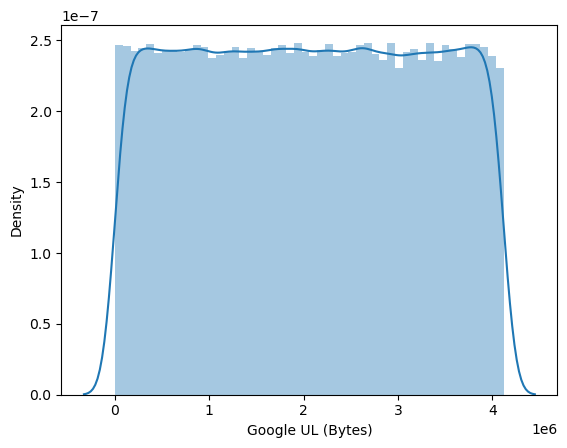

In [117]:
sns.distplot(df_clean1["Google UL (Bytes)"])

In [118]:
df_clean1["Google UL (Bytes)"].skew()

0.0022156581577222954

### Youtube DL (Bytes)

<AxesSubplot:xlabel='Youtube DL (Bytes)', ylabel='Density'>

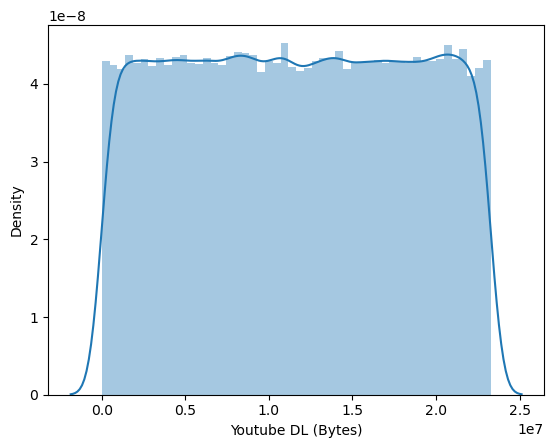

In [119]:
sns.distplot(df_clean1["Youtube DL (Bytes)"])

In [120]:
df_clean1["Youtube DL (Bytes)"].skew()

0.00023117977740596263

### Youtube UL (Bytes)

<AxesSubplot:xlabel='Youtube UL (Bytes)', ylabel='Density'>

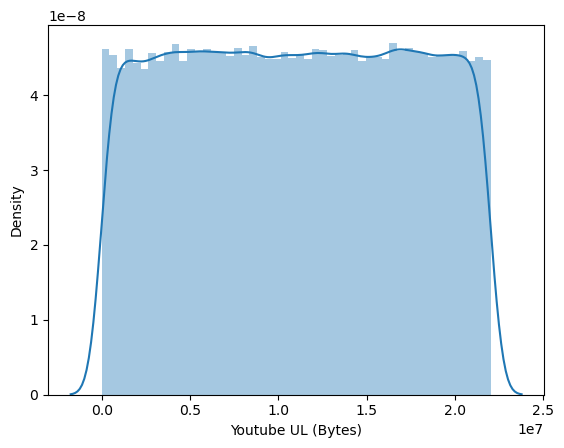

In [121]:
sns.distplot(df_clean1["Youtube UL (Bytes)"])

In [122]:
df_clean1["Youtube UL (Bytes)"].skew()

-0.0011424288125003958

### Other DL (Bytes)

<AxesSubplot:xlabel='Other DL (Bytes)', ylabel='Density'>

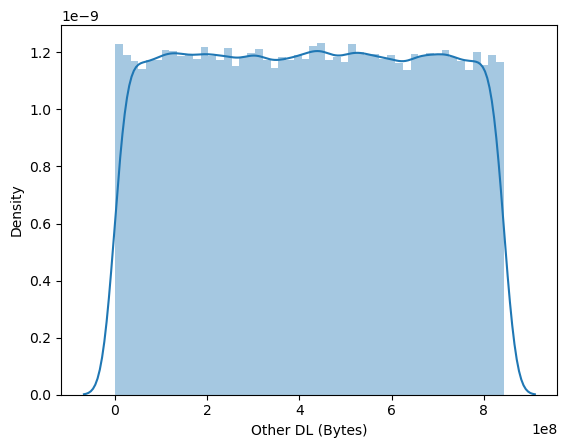

In [123]:
sns.distplot(df_clean1["Other DL (Bytes)"])

In [124]:
df_clean1["Other DL (Bytes)"].skew()

0.0014002337843252303

### Other UL (Bytes)

<AxesSubplot:xlabel='Other UL (Bytes)', ylabel='Density'>

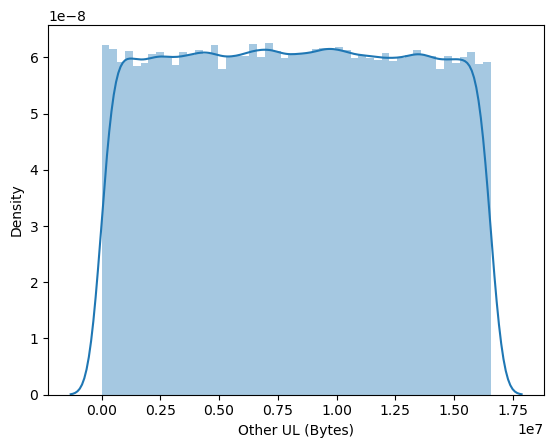

In [125]:
sns.distplot(df_clean1["Other UL (Bytes)"])

In [126]:
df_clean1["Other UL (Bytes)"].skew()

0.0013919082366743007

### Total DL (Bytes)

<AxesSubplot:xlabel='Total DL (Bytes)', ylabel='Density'>

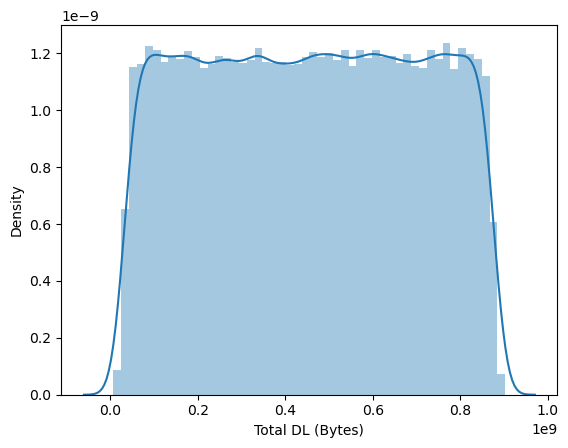

In [127]:
sns.distplot(df_clean1["Total DL (Bytes)"])

In [128]:
df_clean1["Total DL (Bytes)"].skew()

-0.003146851442748234

### Total UL (Bytes)

<AxesSubplot:xlabel='Total UL (Bytes)', ylabel='Density'>

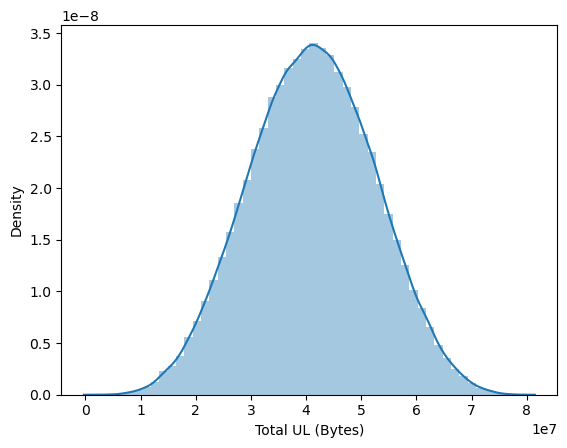

In [129]:
sns.distplot(df_clean1["Total UL (Bytes)"])

In [130]:
df_clean1["Total UL (Bytes)"].skew()

-0.0024426566964420387

### Total DL (Bytes)

<AxesSubplot:xlabel='Total DL (Bytes)'>

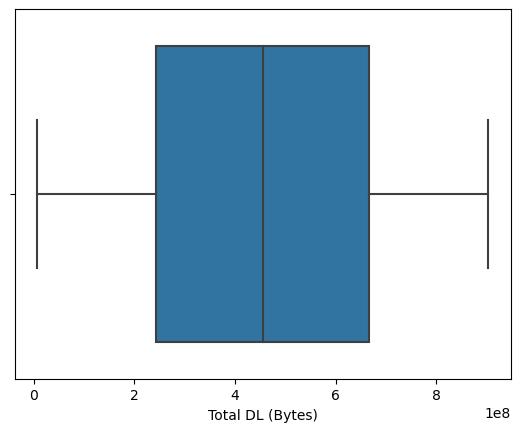

In [131]:
sns.boxplot(df_clean1["Total DL (Bytes)"])

# Bivariate Analysis

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

### Social Media Data Correlation

Text(0, 0.5, 'Social Media UL (Bytes)')

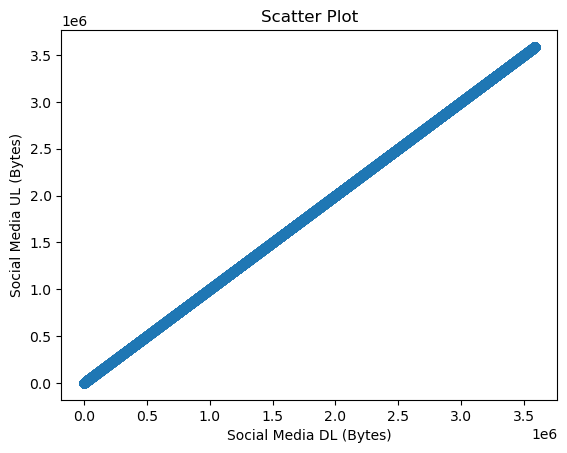

In [133]:
# Scatter plot

plt.scatter(df_clean1["Social Media DL (Bytes)"],df_clean1["Social Media DL (Bytes)"])
plt.title("Scatter Plot")
plt.xlabel("Social Media DL (Bytes)")
plt.ylabel("Social Media UL (Bytes)")

In [134]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Social Media DL (Bytes)"].corr(df_clean1["Social Media UL (Bytes)"])
print(Correlation_Coefficient)                        

-0.0005552550605629292


### Google Data Correlation

<AxesSubplot:xlabel='Google UL (Bytes)', ylabel='Google DL (Bytes)'>

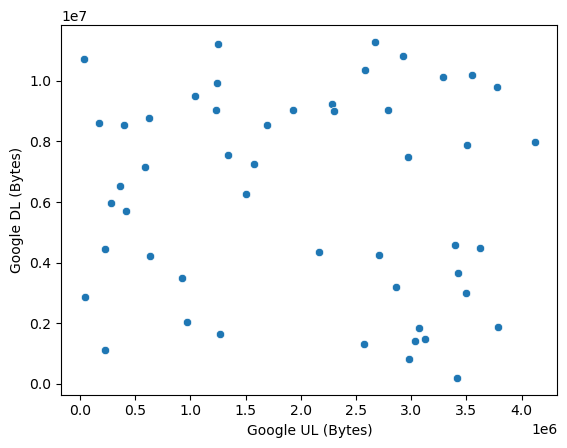

In [135]:
sns.scatterplot(df_clean1["Google UL (Bytes)"].head(50),df_clean1["Google DL (Bytes)"].head(50))

In [136]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Google UL (Bytes)"].corr(df_clean1["Google DL (Bytes)"])
print(Correlation_Coefficient)                        

-0.00010337279625522235


### Email Data Correlation

<AxesSubplot:xlabel='Email UL (Bytes)', ylabel='Email DL (Bytes)'>

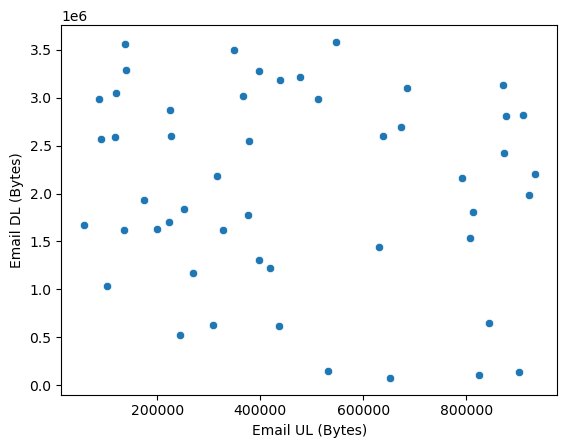

In [137]:
sns.scatterplot(df_clean1["Email UL (Bytes)"].head(50),df_clean1["Email DL (Bytes)"].head(50))

In [138]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Email UL (Bytes)"].corr(df_clean1["Email DL (Bytes)"])
print(Correlation_Coefficient)                        

0.0025527051507825468


### Youtube Data Correlation

<AxesSubplot:xlabel='Youtube UL (Bytes)', ylabel='Youtube DL (Bytes)'>

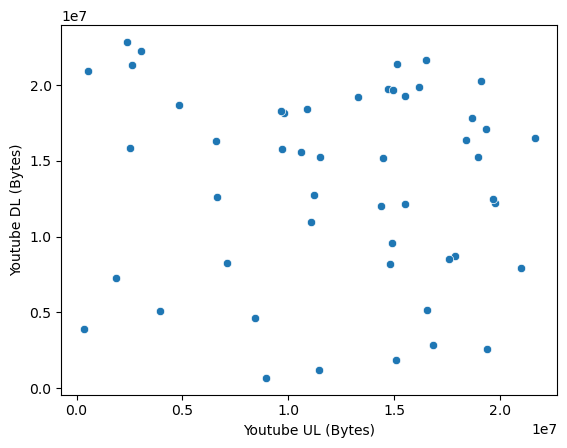

In [139]:
sns.scatterplot(df_clean1["Youtube UL (Bytes)"].head(50),df_clean1["Youtube DL (Bytes)"].head(50))

In [140]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Youtube UL (Bytes)"].corr(df_clean1["Youtube DL (Bytes)"])
print(Correlation_Coefficient)                        

0.00243280008648832


### Netflix Data Correlation

<AxesSubplot:xlabel='Netflix UL (Bytes)', ylabel='Netflix DL (Bytes)'>

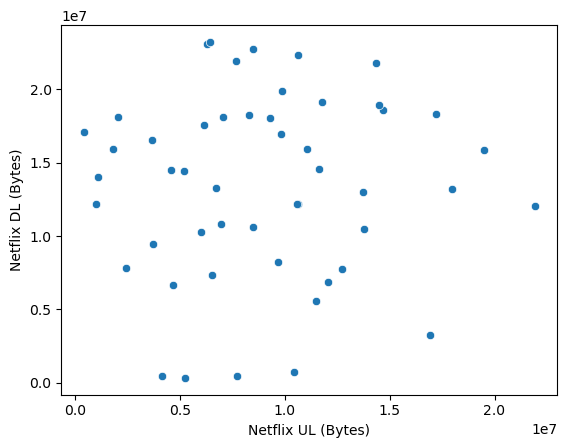

In [141]:
sns.scatterplot(df_clean1["Netflix UL (Bytes)"].head(50),df_clean1["Netflix DL (Bytes)"].head(50))

In [142]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Netflix UL (Bytes)"].corr(df_clean1["Netflix DL (Bytes)"])
print(Correlation_Coefficient)                        

0.0010652722724041547


### Gaming Data Correlation

<AxesSubplot:xlabel='Gaming UL (Bytes)', ylabel='Gaming DL (Bytes)'>

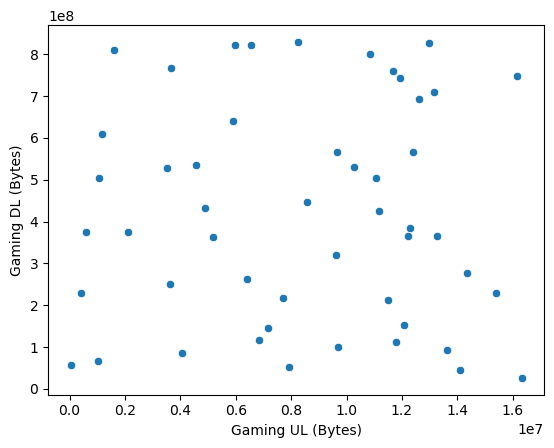

In [143]:
sns.scatterplot(df_clean1["Gaming UL (Bytes)"].head(50),df_clean1["Gaming DL (Bytes)"].head(50))

In [144]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Gaming UL (Bytes)"].corr(df_clean1["Gaming DL (Bytes)"])
print(Correlation_Coefficient)                        

0.001161617807230721


### Other Data Correlation

<AxesSubplot:xlabel='Other UL (Bytes)', ylabel='Other DL (Bytes)'>

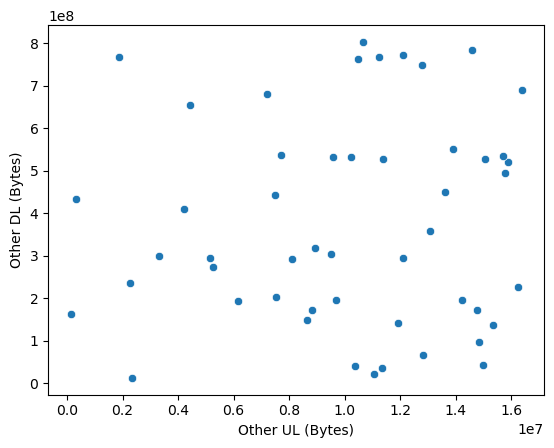

In [145]:
sns.scatterplot(df_clean1["Other UL (Bytes)"].head(50),df_clean1["Other DL (Bytes)"].head(50))

In [146]:
# Correlation Coefficient

Correlation_Coefficient=df_clean1["Other UL (Bytes)"].corr(df_clean1["Other DL (Bytes)"])
print(Correlation_Coefficient)                        

0.003420839439593929


In [147]:
cat_features

Index(['Bearer Id', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')

In [148]:
int_features

Index([], dtype='object')

In [149]:
float_features

Index(['Start ms', 'End ms', 'Dur. (ms)', 'IMSI', 'MSISDN/Number', 'IMEI',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)', 'TCP DL Retrans. Vol (Bytes)',
       'TCP UL Retrans. Vol (Bytes)', 'DL TP < 50 Kbps (%)',
       '50 Kbps < DL TP < 250 Kbps (%)', '250 Kbps < DL TP < 1 Mbps (%)',
       'DL TP > 1 Mbps (%)', 'UL TP < 10 Kbps (%)',
       '10 Kbps < UL TP < 50 Kbps (%)', '50 Kbps < UL TP < 300 Kbps (%)',
       'UL TP > 300 Kbps (%)', 'HTTP DL (Bytes)', 'HTTP UL (Bytes)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',
       'Nb of sec with Vol DL < 6250B', 'Nb of sec with Vol UL < 1250B',
       'Social Media DL (

### Categorical to Categorical

<AxesSubplot:xlabel='Handset Manufacturer', ylabel='Handset Type'>

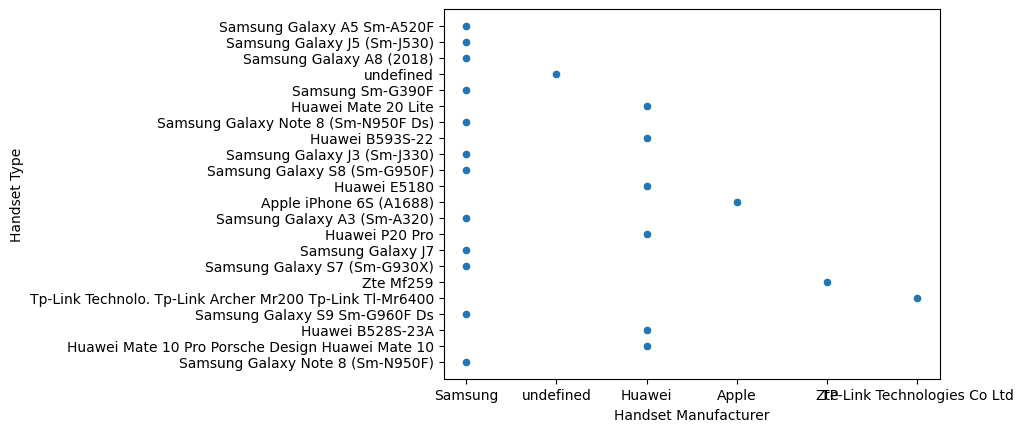

In [150]:
sns.scatterplot(df_clean1["Handset Manufacturer"].head(50),df_clean1["Handset Type"].head(50))

### Numerical to Numerical

<AxesSubplot:xlabel='Total UL (Bytes)', ylabel='Total DL (Bytes)'>

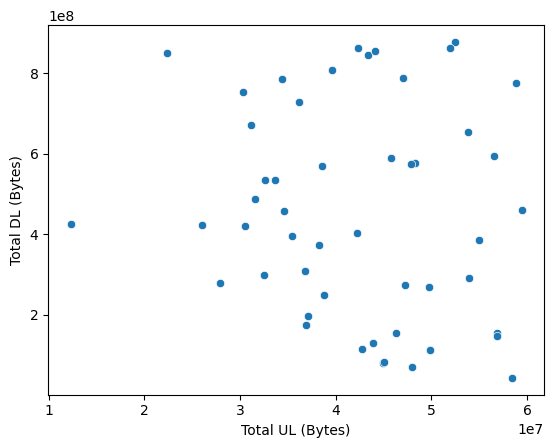

In [151]:
sns.scatterplot(df_clean1["Total UL (Bytes)"].head(50),df_clean1["Total DL (Bytes)"].head(50))

### Numerical to Categorical

<AxesSubplot:xlabel='Total UL (Bytes)', ylabel='Handset Type'>

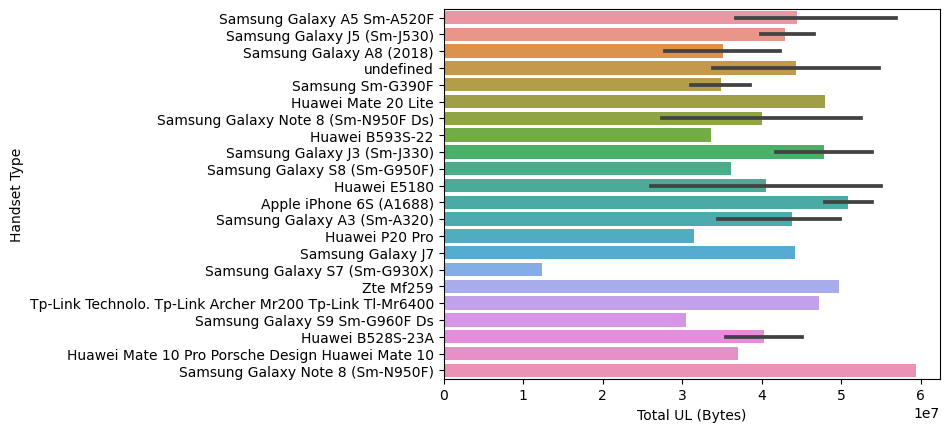

In [152]:
sns.barplot(df_clean1["Total UL (Bytes)"].head(50),df_clean1["Handset Type"].head(50))

<AxesSubplot:xlabel='Total DL (Bytes)', ylabel='Handset Type'>

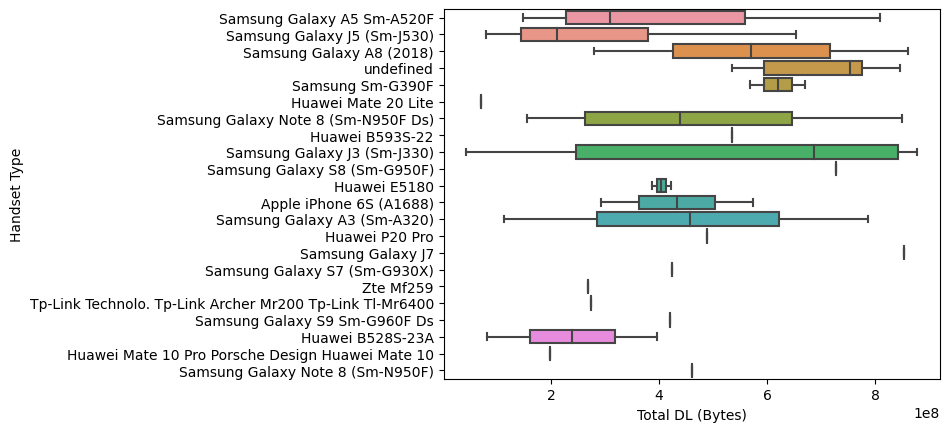

In [153]:
sns.boxplot(df_clean1["Total DL (Bytes)"].head(50),df_clean1["Handset Type"].head(50))

## Cross Tabulation

### Categorical to Categorical

In [154]:
pd.crosstab(df_clean1["Handset Manufacturer"],df_clean1["Handset Type"])

Handset Type,A-Link Telecom I. Cubot A5,A-Link Telecom I. Cubot Note Plus,A-Link Telecom I. Cubot Note S,A-Link Telecom I. Cubot Nova,A-Link Telecom I. Cubot Power,A-Link Telecom I. Cubot R9,A-Link Telecom I. Cubot X18 Plus,Acer Liquid M220,Acer Liquid Z220,Acer Liquid Z530,...,Zte Mf190,Zte Mf259,Zte Mf626,Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Zte Starxtrem By Sfr,Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,Zyxel Communicat. Lte7460,Zyxel Communicat. Sbg3600,Zyxel Communicat. Zyxel Wah7706,undefined
Handset Manufacturer,,,,,,,,,,,,,,,,,,,,,
A-Link Telecom International Co Limited,1,1,1,1,1,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASUSTeK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acer,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Adar,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Alif Communications,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zebra Technologies Corp.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Zte,0,0,0,0,0,0,0,0,0,0,...,1,170,1,5,1,2,0,0,0,0
ZyXEL Communications Corp,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


<AxesSubplot:xlabel='Handset Type', ylabel='Handset Manufacturer'>

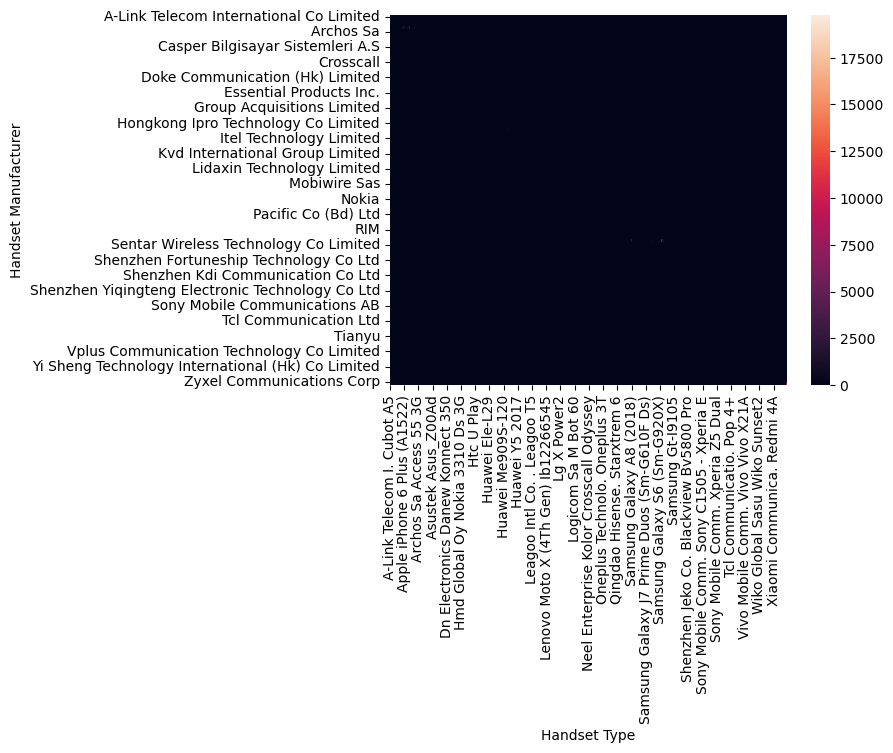

In [155]:
sns.heatmap(pd.crosstab(df_clean1["Handset Manufacturer"],df_clean1["Handset Type"]))

In [156]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Start                           150001 non-null  datetime64[ns]
 1   Start ms                        150001 non-null  float64       
 2   End                             150001 non-null  datetime64[ns]
 3   End ms                          150001 non-null  float64       
 4   Dur. (ms)                       150001 non-null  float64       
 5   IMSI                            150001 non-null  float64       
 6   MSISDN/Number                   150001 non-null  float64       
 7   IMEI                            150001 non-null  float64       
 8   Avg RTT DL (ms)                 150001 non-null  float64       
 9   Avg RTT UL (ms)                 150001 non-null  float64       
 10  Avg Bearer TP DL (kbps)         150001 non-null  float64

# Transforming the data

## Scaling

In [157]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler=MinMaxScaler()
original_data=pd.DataFrame(np.random.exponential(200,size=150002))
original_data.sample(10)

,0
140248,250.101914
59079,99.523754
15001,32.279586
143221,294.141775
19738,215.974314
129125,361.107484
147691,155.102530
32589,161.388234
128028,273.872924
26337,12.685193


In [158]:
original_data[0].min(),original_data[0].max

(0.0010200884002105521,
 <bound method NDFrame._add_numeric_operations.<locals>.max of 0          63.783554
 1         117.436922
 2          24.867596
 3          94.463564
 4          12.327093
              ...    
 149997    387.265696
 149998     46.423782
 149999    231.470326
 150000    147.047321
 150001     62.256045
 Name: 0, Length: 150002, dtype: float64>)

(array([1.1279e+04, 1.0406e+04, 9.6880e+03, 8.9040e+03, 8.2730e+03,
        7.5660e+03, 7.0120e+03, 6.5250e+03, 6.1020e+03, 5.6060e+03,
        5.1580e+03, 4.8260e+03, 4.3730e+03, 4.0810e+03, 3.8200e+03,
        3.5000e+03, 3.2300e+03, 2.9700e+03, 2.7850e+03, 2.5860e+03,
        2.3460e+03, 2.2050e+03, 2.0140e+03, 1.8320e+03, 1.7480e+03,
        1.5950e+03, 1.4420e+03, 1.3830e+03, 1.2610e+03, 1.1600e+03,
        1.0930e+03, 9.8900e+02, 8.8800e+02, 8.7500e+02, 8.1700e+02,
        7.1000e+02, 6.8900e+02, 6.1900e+02, 5.4800e+02, 5.1500e+02,
        4.9200e+02, 4.3000e+02, 4.1100e+02, 4.0200e+02, 3.5300e+02,
        3.3200e+02, 2.9900e+02, 3.1800e+02, 2.7600e+02, 2.4300e+02,
        2.4900e+02, 2.0700e+02, 1.6700e+02, 1.8600e+02, 1.6900e+02,
        1.5100e+02, 1.4800e+02, 1.3200e+02, 1.2300e+02, 1.0600e+02,
        1.0100e+02, 7.8000e+01, 1.0000e+02, 7.7000e+01, 7.7000e+01,
        8.5000e+01, 5.9000e+01, 5.8000e+01, 6.0000e+01, 5.6000e+01,
        4.6000e+01, 3.9000e+01, 3.3000e+01, 4.20

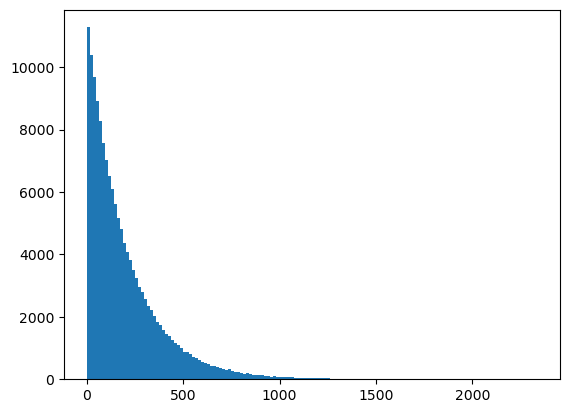

In [159]:
count=plt.hist(original_data,150)
count

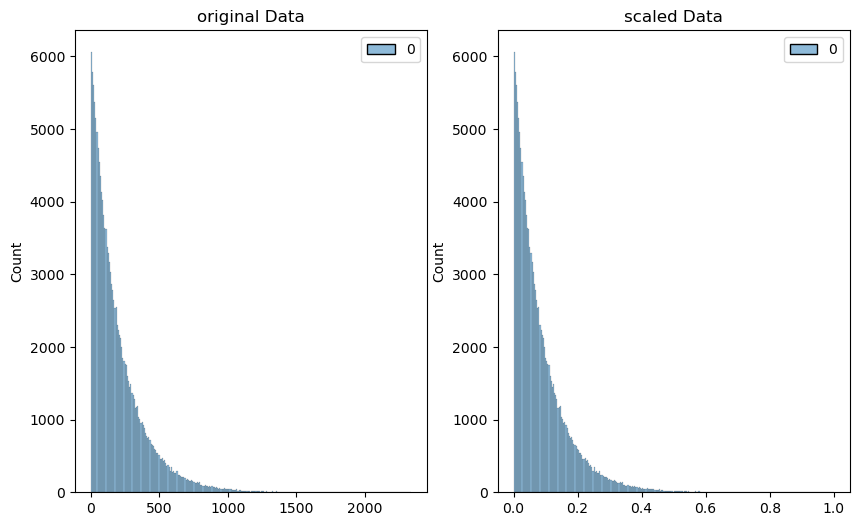

In [160]:
# min-max scale the data beteen 0 and 1

def scaler(df):
  scaled_data = minmax_scaler.fit_transform(df)

  
  fig, ax = plt.subplots(1,2, figsize = (10,6))
  sns.histplot(original_data, ax=ax[0])
  ax[0].set_title("original Data")
  sns.histplot(scaled_data, ax=ax[1])
  ax[1].set_title("scaled Data")

scaler(original_data)

## Normalisation

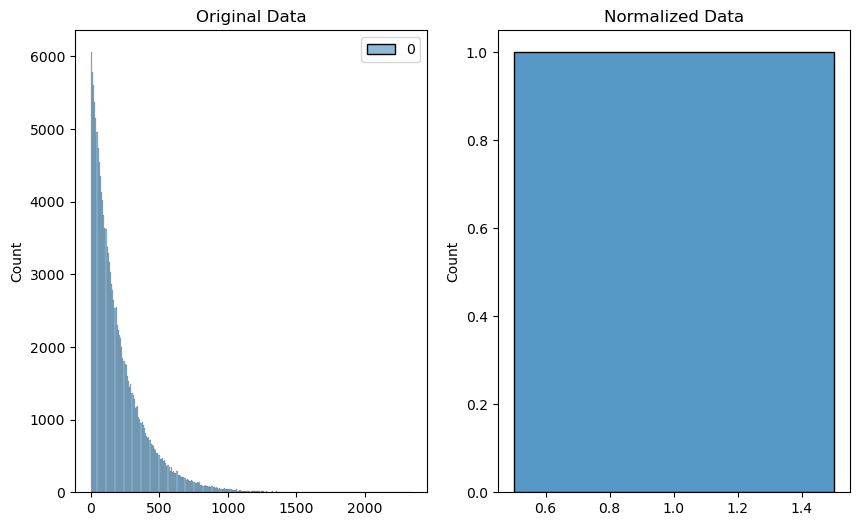

In [161]:
from sklearn.preprocessing import Normalizer

def normalizer(df):
  norm = Normalizer()
  normalized_data = norm.fit_transform(df)

  fig, ax=plt.subplots(1,2, figsize = (10,6))
  sns.histplot(df, ax = ax[0])
  ax[0].set_title('Original Data')
  sns.histplot(normalized_data[0], ax = ax[1])
  ax[1].set_title('Normalized Data')

normalizer(original_data)

In [162]:
df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Start                           150001 non-null  datetime64[ns]
 1   Start ms                        150001 non-null  float64       
 2   End                             150001 non-null  datetime64[ns]
 3   End ms                          150001 non-null  float64       
 4   Dur. (ms)                       150001 non-null  float64       
 5   IMSI                            150001 non-null  float64       
 6   MSISDN/Number                   150001 non-null  float64       
 7   IMEI                            150001 non-null  float64       
 8   Avg RTT DL (ms)                 150001 non-null  float64       
 9   Avg RTT UL (ms)                 150001 non-null  float64       
 10  Avg Bearer TP DL (kbps)         150001 non-null  float64

# One hot Encoding

In [163]:
df_111=df_clean1.copy()
df_111

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,65.0,5.0,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,65.0,5.0,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,65.0,5.0,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,32.0,0.0,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0
149997,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,27.0,2.0,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0
149998,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,43.0,6.0,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0
149999,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,37.0,5.0,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0


In [169]:
df_encod1=df_clean1.copy()
obj_features=df_clean1.select_dtypes(include=["object"]).columns
print(obj_features.shape[0])
print("Categorical features names",obj_features.to_list())

2
Categorical features names ['Handset Manufacturer', 'Handset Type']


In [165]:
df_encod1[obj_features].head(5)

,Handset Manufacturer,Handset Type
0,Samsung,Samsung Galaxy A5 Sm-A520F
1,Samsung,Samsung Galaxy J5 (Sm-J530)
2,Samsung,Samsung Galaxy A8 (2018)
3,undefined,undefined
4,Samsung,Samsung Sm-G390F


In [166]:
df_encod1["Handset Manufacturer"].value_counts()

Apple                               60137
Samsung                             40839
Huawei                              34423
undefined                            8987
Sony Mobile Communications Ab         980
                                    ...  
Pt. Arga Mas Lestari                    1
Doke Communication (Hk) Limited         1
Vastking Technology (Hk) Limited        1
Mobiwire Sas                            1
Shenzhen Gaoxinqi                       1
Name: Handset Manufacturer, Length: 170, dtype: int64

In [167]:
import pandas as pd
df_encod1=pd.get_dummies(df_encod1["Handset Manufacturer"],columns="Handset Manufacturer",prefix="Handset Manufacturer",drop_first=False)
df_encod1

,Handset Manufacturer_A-Link Telecom International Co Limited,Handset Manufacturer_ASUSTeK,Handset Manufacturer_Acer,Handset Manufacturer_Adar,Handset Manufacturer_Alif Communications,Handset Manufacturer_Apple,Handset Manufacturer_Archos SA,Handset Manufacturer_Archos Sa,Handset Manufacturer_Asustek,Handset Manufacturer_Avenir Telecom,...,Handset Manufacturer_Xiaomi Communications Co Ltd,Handset Manufacturer_Yi Sheng Technology International (Hk) Co Limited,Handset Manufacturer_Yop Technology Co Limited,Handset Manufacturer_Yota Devices,Handset Manufacturer_ZTE,Handset Manufacturer_Zebra Technologies Corp.,Handset Manufacturer_Zte,Handset Manufacturer_ZyXEL Communications Corp,Handset Manufacturer_Zyxel Communications Corp,Handset Manufacturer_undefined
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149998,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df_encod1=pd.get_dummies(df_encod1["Handset Type"],columns="Handset Type",prefix="Handset Type",drop_first=False)
df_encod1

,Handset Type_A-Link Telecom I. Cubot A5,Handset Type_A-Link Telecom I. Cubot Note Plus,Handset Type_A-Link Telecom I. Cubot Note S,Handset Type_A-Link Telecom I. Cubot Nova,Handset Type_A-Link Telecom I. Cubot Power,Handset Type_A-Link Telecom I. Cubot R9,Handset Type_A-Link Telecom I. Cubot X18 Plus,Handset Type_Acer Liquid M220,Handset Type_Acer Liquid Z220,Handset Type_Acer Liquid Z530,...,Handset Type_Zte Mf190,Handset Type_Zte Mf259,Handset Type_Zte Mf626,Handset Type_Zte Racer Iii Mini Zte Switch X1 Bouygues Telecom Bs 402 Blade Q Mini Zte Blade G Pro,Handset Type_Zte Starxtrem By Sfr,Handset Type_Zte Zte Blade C2 Smartphone Android By Sfr Startrail 4 Zte Blade Flex T809 Zte T809,Handset Type_Zyxel Communicat. Lte7460,Handset Type_Zyxel Communicat. Sbg3600,Handset Type_Zyxel Communicat. Zyxel Wah7706,Handset Type_undefined
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
149999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Dimensionality Reduction

In [171]:
# Stadarize the feature
scalar = StandardScaler() 
scaled_data = pd.DataFrame(scalar.fit_transform(df_encod1)) 
scaled_data

,0,1,2,3,4,5,6,7,8,9,...,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395
0,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451
1,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451
2,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451
3,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,3.961172
4,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451
149997,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451
149998,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451
149999,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,...,-0.002582,-0.033684,-0.002582,-0.005774,-0.002582,-0.003651,-0.002582,-0.002582,-0.002582,-0.252451


In [172]:
scaled_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395
count,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05
mean,-1.900862e-15,-1.823179e-15,-1.812187e-15,-1.812187e-15,-1.828103e-15,-1.812187e-15,-3.826029e-15,-1.811810e-15,-2.005834e-15,-1.892527e-15,...,-1.812187e-15,-1.367479e-14,-2.432915e-15,-1.341781e-15,-1.812187e-15,-1.082784e-15,-1.811810e-15,-1.812187e-15,-1.812566e-15,2.626374e-14
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,...,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,...,-2.581989e-03,-3.368400e-02,-2.581989e-03,-5.773580e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.524505e-01
25%,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,...,-2.581989e-03,-3.368400e-02,-2.581989e-03,-5.773580e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.524505e-01
50%,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,...,-2.581989e-03,-3.368400e-02,-2.581989e-03,-5.773580e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.524505e-01
75%,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,...,-2.581989e-03,-3.368400e-02,-2.581989e-03,-5.773580e-03,-2.581989e-03,-3.651496e-03,-2.581989e-03,-2.581989e-03,-2.581989e-03,-2.524505e-01
max,3.872983e+02,3.872983e+02,3.872983e+02,3.872983e+02,3.872983e+02,3.872983e+02,2.738604e+02,3.872983e+02,3.872983e+02,3.872983e+02,...,3.872983e+02,2.968769e+01,3.872983e+02,1.732028e+02,3.872983e+02,2.738604e+02,3.872983e+02,3.872983e+02,3.872983e+02,3.961172e+00


In [173]:
df_encod1.shape

(150001, 1396)

# User engagement analysis

### Aggregate the above metrics per customer id (MSISDN) and report the top 10 customers per engagement metric 

In [174]:
import pandas as pd
data= df_clean1.copy()#pd.read_excel('telcom_data.xlsx')
df0=pd.DataFrame(data)
df0["TotalEngagement"]=df0["Total UL (Bytes)"] + df0["Total DL (Bytes)"]
TotalEngagementPerCustomer = df0.groupby('MSISDN/Number')['TotalEngagement'].sum().reset_index()
Top10Customers = TotalEngagementPerCustomer.nlargest(10, 'TotalEngagement')
Top10Customers

,MSISDN/Number,TotalEngagement
6437,3.361489e+10,8.846226e+09
92923,3.376054e+10,8.514774e+09
13180,3.362578e+10,8.499621e+09
13526,3.362632e+10,7.971167e+09
76363,3.367588e+10,7.891111e+09
37052,3.365973e+10,7.705863e+09
63028,3.366646e+10,7.308501e+09
92577,3.376041e+10,7.132371e+09
57241,3.366471e+10,6.872018e+09
86455,3.369879e+10,6.540899e+09


### Normalize each engagement metric and run a k-means (k=3) to classify customers into three groups of engagement. 

In [175]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data=df_clean1.copy()   #pd.read_excel('telcom_data.xlsx')
df01=pd.DataFrame(data)

EngagementMetrics=df01[["Other DL (Bytes)","Total UL (Bytes)","Total DL (Bytes)"]]
scaler = MinMaxScaler()
EngagementNormalized = scaler.fit_transform(EngagementMetrics)

df01Normalized = pd.DataFrame(EngagementNormalized, columns=EngagementMetrics.columns)



In [176]:
# KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df01Normalized['Cluster'] = kmeans.fit_predict(EngagementNormalized)

df01Clustered = pd.concat([df01, df01Normalized['Cluster']], axis=1)
df01Clustered

,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),Cluster
0,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,42.0,5.0,...,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0,0
1,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,65.0,5.0,...,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0,1
2,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,65.0,5.0,...,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0,0
3,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,65.0,5.0,...,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0,1
4,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,65.0,5.0,...,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2019-04-29 07:28:42,451.0,2019-04-30 06:02:33,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,32.0,0.0,...,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,57628851.0,574175259.0,2
149997,2019-04-29 07:28:42,483.0,2019-04-30 10:41:33,187.0,97970.0,2.082019e+14,3.366345e+10,3.566051e+13,27.0,2.0,...,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,39135081.0,666648844.0,1
149998,2019-04-29 07:28:43,283.0,2019-04-30 10:46:12,810.0,98249.0,2.082017e+14,3.362189e+10,3.572121e+13,43.0,6.0,...,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,34912224.0,592786405.0,2
149999,2019-04-29 07:28:43,696.0,2019-04-30 10:40:34,327.0,97910.0,2.082021e+14,3.361962e+10,8.618620e+13,37.0,5.0,...,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,29626096.0,371895920.0,1


In [177]:
df01Normalized['Cluster']

0         0
1         1
2         0
3         1
4         1
         ..
149996    2
149997    1
149998    2
149999    1
150000    0
Name: Cluster, Length: 150001, dtype: int32

### Compute the minimum, maximum, average & total non-normalized metrics for each cluster. Interpret your results visually with accompanying text explaining your findings.
 

In [178]:
kmeans = KMeans(n_clusters=3, random_state=42)
df01['Cluster'] = kmeans.fit_predict(EngagementMetrics)

compute_min_max_avg_total= df01.groupby('Cluster').agg({
    'Other DL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total UL (Bytes)': ['min', 'max', 'mean', 'sum'],
    'Total DL (Bytes)': ['min', 'max', 'mean', 'sum']
}).reset_index()
compute_min_max_avg_total

Cluster Other DL (Bytes)                                           \
                       min          max          mean           sum   
0       0           3290.0  436379989.0  1.994510e+08  9.258115e+12   
1       1          63396.0  843442489.0  4.117331e+08  2.326292e+13   
2       2      419686632.0  843438544.0  6.508605e+08  3.064447e+13   

  Total UL (Bytes)                                         Total DL (Bytes)  \
               min         max          mean           sum              min   
0        4469240.0  77458132.0  4.110002e+07  1.907781e+12      255745435.0   
1        5276726.0  77390291.0  4.117143e+07  2.326186e+12        7114041.0   
2        2866892.0  78331311.0  4.108159e+07  1.934244e+12      215530595.0   

                                            
           max          mean           sum  
0  897998249.0  6.187087e+08  2.871922e+13  
1  463915181.0  1.980238e+08  1.118835e+13  
2  902969616.0  6.008393e+08  2.828932e+13

### Aggregate user total traffic per application and derive the top 10 most engaged users per application

In [ ]:
data=df_clean1.copy()
df01 = pd.DataFrame(data)

Total_Traffic_Per_App=df01.groupby(['MSISDN/Number',"Social Media UL (Bytes)","Social Media DL (Bytes)","Google UL (Bytes)",
                   "Google DL (Bytes)","Email UL (Bytes)","Email DL (Bytes)","Youtube DL (Bytes)",
  "Youtube UL (Bytes)","Netflix DL (Bytes)","Netflix UL (Bytes)","Gaming DL (Bytes)",
                   "Gaming UL (Bytes)","Other DL (Bytes)","Other UL (Bytes)"])["Total UL (Bytes)","Total DL (Bytes)"].sum().reset_index()
Top_10_Per_App= Total_Traffic_Per_App.groupby("Social Media UL (Bytes)").apply(lambda x: x.nlargest(10, "Total DL (Bytes)")).head(10).reset_index(drop=True)
print(Top_10_Per_App)

In [ ]:
Top_10_Per_App= Total_Traffic_Per_App.groupby("Netflix UL (Bytes)").apply(lambda x: x.nlargest(10, ["Total UL (Bytes)","Total DL (Bytes)"])).head(10).reset_index(drop=True)
Top_10_Per_App

In [ ]:
Top_10_Per_App= Total_Traffic_Per_App.groupby("Gaming DL (Bytes)").apply(lambda x: x.nlargest(10, "Total DL (Bytes)")).head(10).reset_index(drop=True)
Top_10_Per_App

### Plot the top 3 most used applications using appropriate charts.  


In [ ]:
import matplotlib.pyplot as plt

data=df_clean1.copy()
df01 = pd.DataFrame(data)
Total_Traffic_Per_App=df01.groupby(['MSISDN/Number',"Social Media UL (Bytes)","Social Media DL (Bytes)","Google UL (Bytes)",
                   "Google DL (Bytes)","Email UL (Bytes)","Email DL (Bytes)","Youtube DL (Bytes)",
  "Youtube UL (Bytes)","Netflix DL (Bytes)","Netflix UL (Bytes)","Gaming DL (Bytes)",
                   "Gaming UL (Bytes)","Other DL (Bytes)","Other UL (Bytes)"])["Total UL (Bytes)"].sum().reset_index()
#Top3Apps = Total_Traffic_Per_App.groupby("Social Media UL (Bytes)","Social Media DL (Bytes)","Google UL (Bytes)",
#                   "Google DL (Bytes)","Email UL (Bytes)","Email DL (Bytes)","Youtube DL (Bytes)",
 # "Youtube UL (Bytes)","Netflix DL (Bytes)","Netflix UL (Bytes)","Gaming DL (Bytes)",
  #                 "Gaming UL (Bytes)","Other DL (Bytes)","Other UL (Bytes)")['Total UL (Bytes)'].sum().nlargest(3)

plt.figure(figsize=(8, 6))
Total_Traffic_Per_App.plot(kind='bar', color='skyblue')
plt.title('Top 3 Most Used Applications')
plt.xlabel('Application')
plt.ylabel('Total Upload Traffic')
plt.show()


plt.figure(figsize=(8, 8))
plt.pie(Total_Traffic_Per_App, labels=top_3_apps.index, autopct='%1.1f%%', colors=['lightcoral', 'lightgreen', 'lightskyblue'])
plt.title('Top 3 Most Used Applications')
plt.show()


### Using the k-means clustering algorithm, group users in k engagement clusters based on the engagement metrics: 
### What is the optimized value of k (use the elbow method for this)?  
### Interpret your findings. 


In [ ]:
df_clean1.isnull().sum()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


data=df_clean1.copy()  
df01=pd.DataFrame(data)
  
EngagementMetrics=df01[["Other DL (Bytes)","Total UL (Bytes)","Total DL (Bytes)"]]
print(EngagementMetrics)
scaler = StandardScaler()
EngagementMetricsStandardized = scaler.fit_transform(EngagementMetrics)

#print(EngagementMetricsStandardized)
InertiaValues = []
k_values = range(1,11)
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(EngagementMetricsStandardized)
    InertiaValues.append(kmeans.inertia_)
print(InertiaValues)
# elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, InertiaValues, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()
